<a href="https://colab.research.google.com/github/MichaelKupfer/MAT421/blob/main/mat421_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 17 - Interpolation**

17.4 Lagrange Polynomial Interpolation

Similar to cubic spline interpolation, a polynomial is used to interpolate values, but instead of a different polynomial between each data point, one polynomial goes through all the data points. 

Use the lagrange function from scipy to graph lagrange interpolation

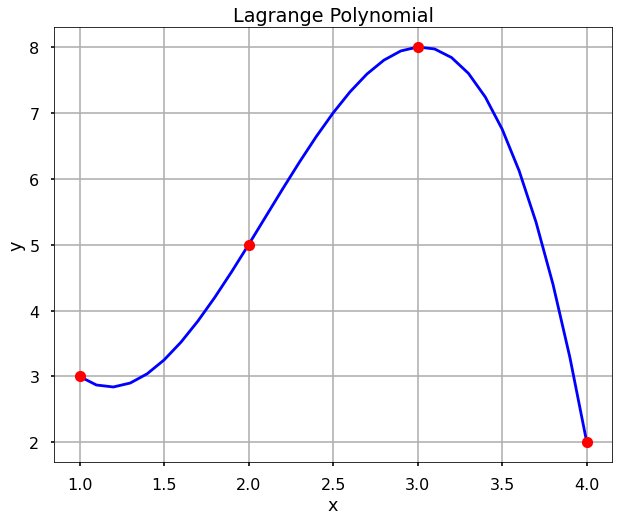

In [4]:
from scipy.interpolate import lagrange
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

x = [1,2,3,4]
y = [3,5,8,2]

f = lagrange(x, y)
x_new = np.arange(1.0,4.1,0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

17.5 Newton's Polynomial Interpolation

Another polynomial method that allows for a very easy calculation of its coefficients. Using the iteration formula a divided differences table can be found that calculates those coefficients. Additionally, adding new data points will not change the already calculated ones. 

Use Newton's polynomial interpolation method

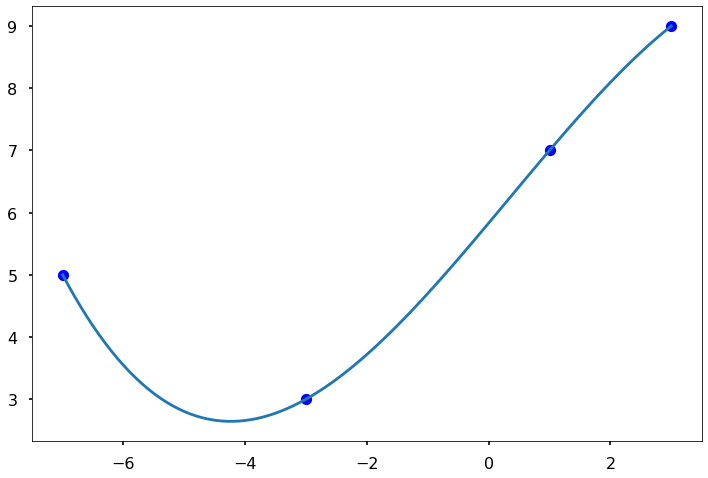

In [7]:
%matplotlib inline

def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

x = np.array([-7, -3, 1, 3])
y = np.array([5, 3, 7, 9])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-7, 3.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)